In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os

if os.path.exists("MSFT.csv"):
    data = pd.read_csv("MSFT.csv", index_col=0)
else: #download data if not found
    data = yf.Ticker("MSFT")
    data = data.history(period="max")
    data.to_csv("MSFT.csv")



# Convert the index to datetime with utc=True
data.index = pd.to_datetime(data.index, utc=True)

# Ensure the index is a DatetimeIndex
if not isinstance(data.index, pd.DatetimeIndex):
    data = data.set_index(pd.to_datetime(data.index, utc=True))

# Filter data to include only records from 2016 onwards
data = data[data.index.year >= 2015]

# reset the index (the index will be 0,1,2... rather than the date)
# data = data.reset_index()

#volume values are too lage
data['Volume'] = data['Volume']/10000000

data.head(10)

<ipython-input-3-cea90ec73387>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Volume'] = data['Volume']/10000000


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2015-01-02 05:00:00+00:00,40.366218,41.023703,40.262405,40.452728,2.79139,0.0,0.0
2015-01-05 05:00:00+00:00,40.115348,40.426789,40.011535,40.080746,3.96739,0.0,0.0
2015-01-06 05:00:00+00:00,40.123995,40.444086,39.397299,39.492462,3.64479,0.0,0.0
2015-01-07 05:00:00+00:00,39.777954,40.193208,39.354049,39.994232,2.91141,0.0,0.0
2015-01-08 05:00:00+00:00,40.444088,41.309202,40.418136,41.170784,2.96452,0.0,0.0
2015-01-09 05:00:00+00:00,41.188083,41.369757,40.573853,40.824734,2.39442,0.0,0.0
2015-01-12 05:00:00+00:00,41.023709,41.127525,40.106690,40.314316,2.36519,0.0,0.0
2015-01-13 05:00:00+00:00,40.634421,41.447627,39.847167,40.106701,3.52706,0.0,0.0
2015-01-14 05:00:00+00:00,39.760647,40.002881,39.466508,39.760647,2.97196,0.0,0.0


visiulizing data

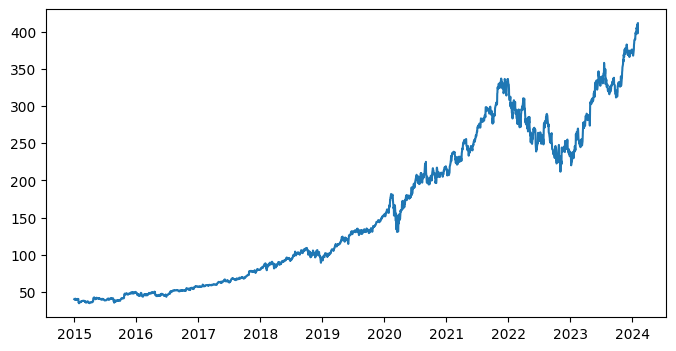

In [ ]:
# # Plotting
plt.figure(figsize=(8,4))
plt.plot(data['Close'], label='Closing Price')

preparation data

In [ ]:
data['Open - Close'] = data['Open'] - data['Close']
data['High - Low'] = data['High'] - data['Low']
data = data.dropna()
data['Close Tomorrow'] = (data['Close'].shift(-1) > data['Close']).astype(int)* 2 - 1  # * 2 - 1 ==>   replaces 0 with -1

data.head()

# X = data[['Open - Close', 'High - Low']] #without volume
X = data[['Volume', 'Open - Close', 'High - Low']]
# X.head()

# y = np.where(data['Close'].shift(-1) > data['Close'],1,-1)
y = data['Close Tomorrow']
# y.head()
# data.tail()

spliting data to (train) and (test) data

In [ ]:
from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) #without random_state=44
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)

Implementaion of KNN (k-nearest neighbors) Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV #for selecting best parameter (K) for the model
from sklearn.metrics import accuracy_score

#using GridSearch to find the best parameter
params = {'n_neighbors': [2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
knn = neighbors.KNeighborsClassifier()
model = GridSearchCV(knn, params, cv=5)
#cv=5 means that the model evaluation is done using 5-fold cross-validation during the grid search for finding the best parameter (n_neighbors) for the KNeighborsClassifier.

#fit the model
model.fit(X_train, y_train)

#Accuracy Score
accuracy_train = accuracy_score(y_train, model.predict(X_train))
accuracy_test = accuracy_score(y_test, model.predict(X_test))

In [ ]:
print(f'Train_data Accuracy: {accuracy_train:.2f}%')
print(f'Test_data Accuracy: {accuracy_test:.2f}%')

Train_data Accuracy: 0.61%
Test_data Accuracy: 0.53%


In [ ]:
actual_predicted_data = pd.DataFrame({'Actual Class':y_test, 'Predicted Class':model.predict(X_test)})
actual_predicted_data.head(10)

,Actual Class,Predicted Class
Date,,
2020-05-05 04:00:00+00:00,1,-1
2019-02-15 05:00:00+00:00,-1,-1
2021-09-15 04:00:00+00:00,1,1
2019-07-01 04:00:00+00:00,1,1
2018-12-13 05:00:00+00:00,-1,1
2019-10-01 04:00:00+00:00,-1,1
2022-01-26 05:00:00+00:00,1,1
2021-09-21 04:00:00+00:00,1,-1
2021-02-16 05:00:00+00:00,1,1


Implementaion of (Logistic Regression)

In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)

lg_accuracy_train = accuracy_score(y_train, lg_model.predict(X_train))
lg_accuracy_test = accuracy_score(y_test, lg_model.predict(X_test))

print(f'Train_data Accuracy: {lg_accuracy_train:.2f}%')
print(f'Test_data Accuracy: {lg_accuracy_test:.2f}%')

Train_data Accuracy: 0.54%
Test_data Accuracy: 0.54%


Implementaion of (Naive Bayes)

In [ ]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB

nv_model = GaussianNB()
nv_model = nv_model.fit(X_train, y_train)

nv_accuracy_train = accuracy_score(y_train, nv_model.predict(X_train))
nv_accuracy_test = accuracy_score(y_test, nv_model.predict(X_test))

print(f'Train_data Accuracy: {nv_accuracy_train:.2f}%')
print(f'Test_data Accuracy: {nv_accuracy_test:.2f}%')

Train_data Accuracy: 0.54%
Test_data Accuracy: 0.51%


Implementaion of (SVM)  Support Vector Machine

In [ ]:
from sklearn.svm import SVC

svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

svm_accuracy_train = accuracy_score(y_train, svm_model.predict(X_train))
svm_accuracy_test = accuracy_score(y_test, svm_model.predict(X_test))

print(f'Train_data Accuracy: {svm_accuracy_train:.2f}%')
print(f'Test_data Accuracy: {svm_accuracy_test:.2f}%')

Train_data Accuracy: 0.55%
Test_data Accuracy: 0.54%


In [ ]:
data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Open - Close,High - Low,Close Tomorrow
Date,,,,,,,,,,
2016-01-04 05:00:00+00:00,48.272313,48.698872,47.445853,48.698872,5.37780,0.0,0.0,-0.426559,1.253018,1
2016-01-05 05:00:00+00:00,48.814408,49.223194,48.467829,48.921047,3.40797,0.0,0.0,-0.106639,0.755365,-1
2016-01-06 05:00:00+00:00,48.272338,48.343433,47.668045,48.032398,3.95189,0.0,0.0,0.239940,0.675388,-1
2016-01-07 05:00:00+00:00,46.832697,47.534744,46.272837,46.361702,5.65649,0.0,0.0,0.470995,1.261907,1
2016-01-08 05:00:00+00:00,46.539416,47.348102,46.343912,46.503872,4.87540,0.0,0.0,0.035544,1.004190,-1


In [ ]:
horizons = [2,5,60,250] #2days , week, ...

for horizon in horizons:
    rolling_averages = data.rolling(horizon).mean()

    ratio_column = f"Close_Ratio_{horizon}"
    data[ratio_column] = data["Close"] / rolling_averages["Close"]

    trend_column = f"Trend_{horizon}"
    data[trend_column] = data.shift(1).rolling(horizon).sum()["Close Tomorrow"]


# data = data.dropna(subset=data.columns[data.columns != "Tomorrow"])
data = data.dropna()


data

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Open - Close,High - Low,Close Tomorrow,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250
Date,,,,,,,,,,,,,,,,,,
2015-12-30 05:00:00+00:00,50.182958,50.458442,50.022998,50.040771,2.17045,0.0,0.0,0.142186,0.435444,-1,0.997874,0.0,1.004460,1.0,1.067381,8.0,1.221784,0.0
2015-12-31 05:00:00+00:00,49.800835,49.934133,49.249860,49.303181,2.73341,0.0,0.0,0.497654,0.684273,-1,0.992575,-2.0,0.990856,-1.0,1.048652,6.0,1.202692,0.0
2016-01-04 05:00:00+00:00,48.272320,48.698879,47.445861,48.698879,5.37780,0.0,0.0,-0.426559,1.253018,1,0.993834,-2.0,0.981762,-1.0,1.033094,4.0,1.186885,0.0
2016-01-05 05:00:00+00:00,48.814404,49.223190,48.467825,48.921043,3.40797,0.0,0.0,-0.106639,0.755364,-1,1.002276,0.0,0.989432,-1.0,1.035231,4.0,1.191263,0.0
2016-01-06 05:00:00+00:00,48.272319,48.343414,47.668026,48.032379,3.95189,0.0,0.0,0.239940,0.675388,-1,0.990834,0.0,0.980268,-3.0,1.014120,4.0,1.168842,-2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-29 05:00:00+00:00,406.059998,409.980011,404.329987,409.720001,2.45102,0.0,0.0,-3.660004,5.650024,-1,1.007116,0.0,1.014168,3.0,1.090074,18.0,1.263050,28.0
2024-01-30 05:00:00+00:00,412.260010,413.049988,406.450012,408.589996,3.34776,0.0,0.0,3.670013,6.599976,-1,0.998619,0.0,1.006543,1.0,1.084028,16.0,1.257041,26.0
2024-01-31 05:00:00+00:00,406.959991,415.320007,397.209991,397.579987,4.78711,0.0,0.0,9.380005,18.110016,1,0.986343,-2.0,0.981829,-1.0,1.052492,14.0,1.220959,24.0


In [ ]:
X_2 = data[['Volume', 'Open - Close', 'High - Low', 'Close_Ratio_2', 'Close_Ratio_5', 'Close_Ratio_60', "Close_Ratio_250", 'Trend_2', 'Trend_5', 'Trend_60', "Trend_250"]]

y_2 = data['Close Tomorrow']

X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, test_size=0.2, random_state=44)

#using GridSearch to find the best parameter
params = {'n_neighbors': [2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
knn = neighbors.KNeighborsClassifier()
model = GridSearchCV(knn, params, cv=5)
#cv=5 means that the model evaluation is done using 5-fold cross-validation during the grid search for finding the best parameter (n_neighbors) for the KNeighborsClassifier.

#fit the model
model.fit(X_train, y_train)

#Accuracy Score
accuracy_train = accuracy_score(y_train, model.predict(X_train))
accuracy_test = accuracy_score(y_test, model.predict(X_test))

print(f'Train_data Accuracy: {accuracy_train:.2f}%')
print(f'Test_data Accuracy: {accuracy_test:.2f}%')

Train_data Accuracy: 0.63%
Test_data Accuracy: 0.52%
